# Spatial weights

In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the file in
gdf = gpd.read_file(
    "https://darribas.org/gds_course/content/data/liv_lsoas.gpkg"
)
# Index table on the LSOA ID
gdf = gdf.set_index("LSOA11CD", drop=False)
# Display summary
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LSOA11CD  298 non-null    object  
 1   MSOA11CD  298 non-null    object  
 2   geometry  298 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 9.3+ KB


In [5]:
gdf.head()

,LSOA11CD,MSOA11CD,geometry
LSOA11CD,,,
E01006512,E01006512,E02001377,"POLYGON ((336103.358 389628.580, 336103.416 38..."
E01006513,E01006513,E02006932,"POLYGON ((335173.781 389691.538, 335169.798 38..."
E01006514,E01006514,E02001383,"POLYGON ((335495.676 389697.267, 335495.444 38..."
E01006515,E01006515,E02001383,"POLYGON ((334953.001 389029.000, 334951.000 38..."
E01006518,E01006518,E02001390,"POLYGON ((335354.015 388601.947, 335354.000 38..."


<Axes: >

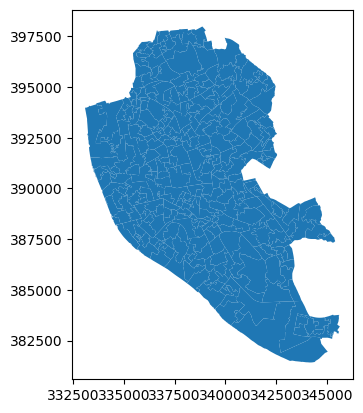

In [6]:
gdf.plot()

In [4]:
w_queen = weights.Queen.from_dataframe(gdf, idVariable="LSOA11CD")
w_queen

/var/folders/rc/qy8z9khd3lg00kj97hlgl5z00000gn/T/ipykernel_80313/4102151150.py:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen = weights.Queen.from_dataframe(gdf, idVariable="LSOA11CD")


In [12]:
# w_queen['E01006690']
# w_queen['E01006690']['E01006691']

{'E01006697': 1.0,
 'E01006695': 1.0,
 'E01033763': 1.0,
 'E01006759': 1.0,
 'E01006691': 1.0,
 'E01006720': 1.0,
 'E01006692': 1.0}

In [11]:
# w_queen.weights

{'E01006512': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006513': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006514': [1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006515': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006518': [1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006519': [1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006520': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006521': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006522': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006523': [1.0, 1.0, 1.0, 1.0],
 'E01006524': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006525': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006526': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006527': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006528': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006529': [1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006530': [1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006531': [1.0, 1.0, 1.0, 1.0],
 'E01006532': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006533': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'E01006534': [1.0, 1.0, 1.0, 1.0],
 'E01006535': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [15]:
w_queen.cardinalities['E01006524']  # number of neighbours

# w_queen.cardinalities

6

In [16]:
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

E01006512    6
E01006513    9
E01006514    5
E01006515    8
E01006518    5
dtype: int64

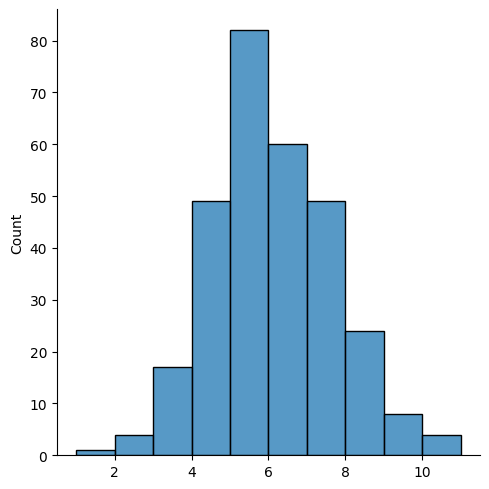

In [19]:
sns.displot(queen_card, bins=10)

In [20]:
w_queen.n

298

In [22]:
w_queen.islands  # observation disconnected

[]

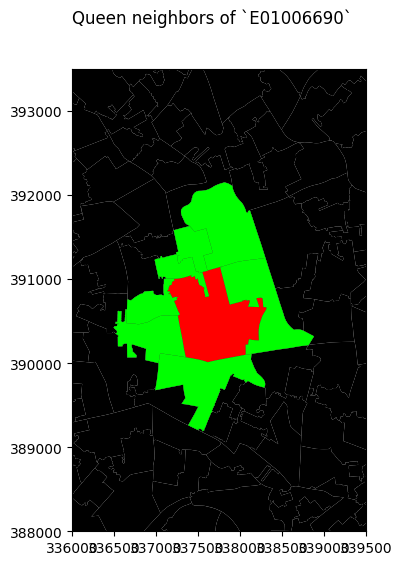

In [26]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot base layer of polygons
gdf.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = gdf.loc[['E01006690'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = gdf.loc[w_queen['E01006690'].keys(), :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Title
f.suptitle("Queen neighbors of `E01006690`")
# Style and display on screen
ax.set_ylim(388000, 393500)
ax.set_xlim(336000, 339500)
plt.show()

In [25]:
w_queen['E01006690'].keys()

dict_keys(['E01006697', 'E01006695', 'E01033763', 'E01006759', 'E01006691', 'E01006720', 'E01006692'])

In [28]:
w_rook = weights.Rook.from_dataframe(gdf)
w_rook

/var/folders/rc/qy8z9khd3lg00kj97hlgl5z00000gn/T/ipykernel_50306/1269015481.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = weights.Rook.from_dataframe(gdf)


# Distance weights

In [29]:
# k nearest neighbours
knn5 = weights.KNN.from_dataframe(gdf, k=5)
knn5

In [32]:
# distance band
w_dist1kmB = weights.DistanceBand.from_dataframe(gdf, 1000)

/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(


In [33]:
w_dist1kmB['E01006690']

{'E01006691': 1.0,
 'E01006692': 1.0,
 'E01006695': 1.0,
 'E01006697': 1.0,
 'E01006720': 1.0,
 'E01006725': 1.0,
 'E01006726': 1.0,
 'E01033763': 1.0}

In [34]:
gdf.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [38]:
w_dist1kmC = weights.DistanceBand.from_dataframe(gdf, 1000, binary=False)

/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


In [39]:
w_dist1kmC['E01006690']

{'E01006691': 0.001320115452290246,
 'E01006692': 0.0016898106255168294,
 'E01006695': 0.001120923796462639,
 'E01006697': 0.001403469553911711,
 'E01006720': 0.0013390451319917913,
 'E01006725': 0.001009044334260805,
 'E01006726': 0.0010528395831202145,
 'E01033763': 0.0012983249272553688}

In [40]:
# block weights
w_block = weights.block_weights(gdf['MSOA11CD'])

/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/weights/util.py:296: UserWarning: The weights matrix is not fully connected: 
 There are 61 disconnected components.
  w = W(neighbors, **kwargs)


In [5]:
# spatial lag

gdf['area'] = np.log(gdf.area)

gdf.head()

,LSOA11CD,MSOA11CD,geometry,area
LSOA11CD,,,,
E01006512,E01006512,E02001377,"POLYGON ((336103.358 389628.580, 336103.416 38...",12.557258
E01006513,E01006513,E02006932,"POLYGON ((335173.781 389691.538, 335169.798 38...",13.234428
E01006514,E01006514,E02001383,"POLYGON ((335495.676 389697.267, 335495.444 38...",12.476712
E01006515,E01006515,E02001383,"POLYGON ((334953.001 389029.000, 334951.000 38...",12.807870
E01006518,E01006518,E02001390,"POLYGON ((335354.015 388601.947, 335354.000 38...",12.363009


In [42]:
gdf.head()

,LSOA11CD,MSOA11CD,geometry
LSOA11CD,,,
E01006512,E01006512,E02001377,"POLYGON ((336103.358 389628.580, 336103.416 38..."
E01006513,E01006513,E02006932,"POLYGON ((335173.781 389691.538, 335169.798 38..."
E01006514,E01006514,E02001383,"POLYGON ((335495.676 389697.267, 335495.444 38..."
E01006515,E01006515,E02001383,"POLYGON ((334953.001 389029.000, 334951.000 38..."
E01006518,E01006518,E02001390,"POLYGON ((335354.015 388601.947, 335354.000 38..."


In [6]:
# Row-standardize the queen matrix
w_queen.transform = 'R'
# Compute spatial lag of `area`
w_queen_score = weights.lag_spatial(w_queen, gdf["area"])
# Print the first five elements
w_queen_score[:5]

array([12.40660189, 12.54225296, 12.28284814, 12.61675295, 12.55042815])

In [8]:
gdf['w_area'] = w_queen_score

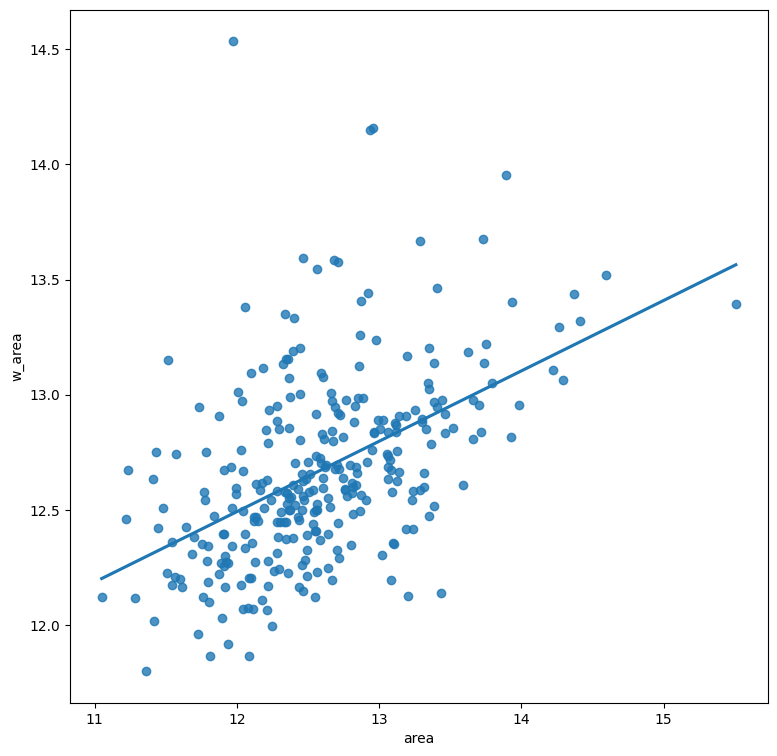

In [9]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="area", y="w_area", data=gdf, ci=None)
# Display
plt.show()